<center>

# Práctico Aprendizaje No Supervisado 2020 DiploDatos
## Ejercicios de agrupamiento no supervisado usando FIFA 2020
    
    -Alessio Bocco
    -Agustin Ramello de la Vega
    -Florencia Maldonado
    -Gonzalo Torres
    


# Inicialización-del-entorno

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
!pip install pca

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.express as px

# Exploración-de-la-base

Cargamos los datos bajados de la database de de Kaggle
https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv -  

In [3]:
df=pd.read_csv("players_20.csv")
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   
3        NaN     NaN       87.0         92.0        78.0         89.0   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   
2       NaN             NaN   
3      52.0            90.0   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                

In [4]:
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)
104


**Realizamos el histograma de la variable "Overall" (Desempeño global)**

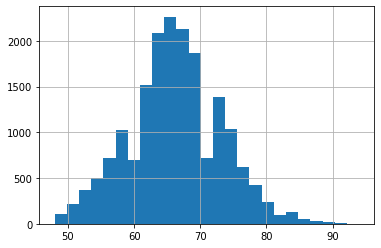

In [5]:
df['overall'].hist(bins = 25)

Seleccionamos los mejores jugadores por posición.

In [6]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position

team_position           short_name  overall
2             CAM            Neymar Jr       92
126            CB           S. de Vrij       84
21            CDM      Sergio Busquets       89
46             CF           K. Benzema       87
123            CM         Luis Alberto       84
3              GK             J. Oblak       91
306           LAM               Taison       82
51             LB           Jordi Alba       87
7             LCB          V. van Dijk       90
33            LCM          David Silva       88
24            LDM             P. Pogba       88
259            LF          K. Demirbay       82
38             LM        P. Aubameyang       88
54             LS           L. Insigne       87
1              LW    Cristiano Ronaldo       93
483           LWB       M. Halstenberg       80
95            RAM            H. Ziyech       85
61             RB           J. Kimmich       86
29            RCB                Piqué       88
5             RCM         K. De Bruyne       91
78            RDM  S. Milinković-Savić       85
93            RES            M. Icardi       85
109            RF           K. Havertz       84
27             RM           C. Eriksen       88
104            RS           Iago Aspas       85
0              RW             L. Messi       94
476           RWB         P. Kadeřábek       80
12             ST              H. Kane       89
48            SUB           D. Mertens       87

In [7]:
# Create dataset with the best players
df_n = df[df['overall']>70]
#df_n = df.copy()

<Figure size 1800x1200 with 0 Axes>

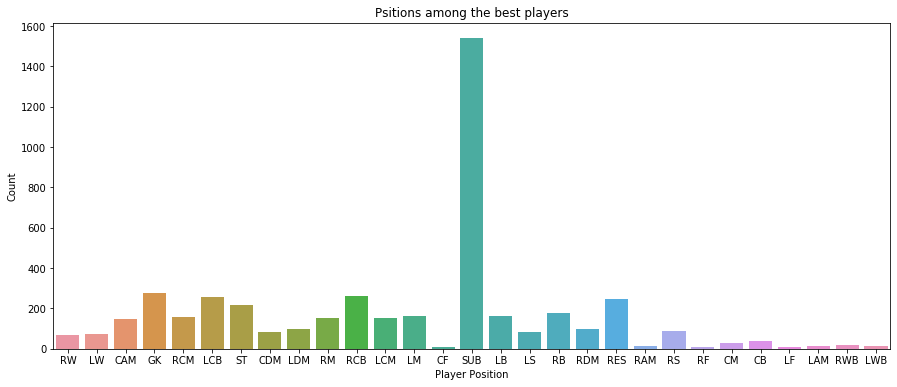

In [8]:
plt.figure(dpi=300)
plt.figure(figsize=(15,6))
sns.countplot('team_position', data = df_n)
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Psitions among the best players')
plt.show()

Variables **RES** and **SUB** mean reserves and substitutes hence they have no relation to the skills pf the players, therefore, they will be dropped.

<Figure size 1800x1200 with 0 Axes>

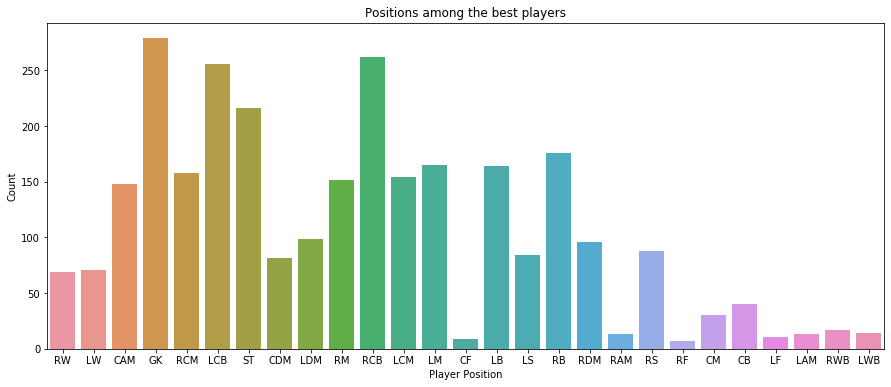

In [9]:
# Variables to drop
drop_list = ['SUB', 'RES']
# Dropping variables
df_n = df_n[~df_n['team_position'].isin(drop_list)]

plt.figure(dpi=300)
plt.figure(figsize=(15,6))
sns.countplot('team_position', data = df_n)
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Positions among the best players')
plt.show()

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [10]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores



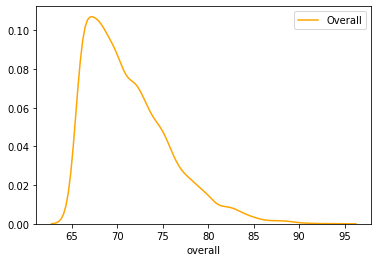

In [11]:
sns.distplot(df_n.overall, hist=None, color = 'orange', label = 'Overall')


In [12]:
np.percentile(df_n.overall, 40)

69.0

An Overall value of above 70 means that from this stage onwards we will work with players above the 40th percentile. This menas the worst players, which potentially could have the most dispersion within their features will be discarded. 

In [13]:
#n=10000 #cantidad de jugadores a considerar

#df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['overall',
     'pace',
     'shooting',
     'passing',
     'dribbling',
     'defending',
     'physic',
     'attacking_crossing',
     'attacking_finishing',
     'attacking_heading_accuracy',
     'attacking_short_passing',
     'attacking_volleys',
     'skill_dribbling',
     'skill_curve',
     'skill_fk_accuracy',
     'skill_long_passing',
     'skill_ball_control',
     'movement_acceleration',
     'movement_sprint_speed',
     'movement_agility',
     'movement_reactions',
     'movement_balance',
     'power_shot_power',
     'power_jumping',
     'power_stamina',
     'power_strength',
     'power_long_shots',
     'mentality_aggression',
     'mentality_interceptions',
     'mentality_positioning',
     'mentality_vision',
     'mentality_penalties',
     'mentality_composure',
     'defending_marking',
     'defending_standing_tackle',
     'defending_sliding_tackle',
     'goalkeeping_diving',
     'goalkeeping_handling',
     'goalkeeping_kicking',
     'goalkeeping_positioning',
     'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

41 variables numéricas de desempeño según habilidad


In [14]:
#Eliminamos posisiones suplentes y reservas, ya que entendemos que sus posiciones en el equipo pueden no estar definidas
df_n=df_n[~((df.team_position == 'RES') | (df_n.team_position == 'SUB'))]

#Para lograr separar las diferentes posiciones, creamos la columna que quita granularidad a las posiciones
FW=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
MF=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
DEF=['RCB','CB','LCB','LB','RB','RWB','LWB']
GK=['GK']

#Alternativa 1: Usar un diccionario

posiciones = {'RF':'FW','ST':'FW', 'LW':'FW', 'LF':'FW', 'RS':'FW', 'LS':'FW', 'RM':'FW', 'LM':'FW','RW':'FW',
        'RCM':'MF','LCM':'MF','LDM':'MF','CAM':'MF','CDM':'MF','LAM':'MF','RDM':'MF','CM':'MF','RAM':'MF','CF':'MF',
        'RCB':'DEF','CB':'DEF','LCB':'DEF','LB':'DEF','RB':'DEF','RWB':'DEF','LWB':'DEF',
        'GK':'GK'}

df_n['team_position_general'] = df_n['team_position'].apply(lambda x : posiciones.get(x))


#Creamos una variable numérica para determinar la posición general del jugador según su club.

def pos_num(position):
    if position == 'FW':
        return 0
    elif position == 'MF':
        return 1
    elif position == 'DEF':
        return 2
    elif position == 'GK':
        return 3
    else:
        return 'nan'
    
df_n["team_position_num"]=df_n["team_position_general"].apply(lambda x: pos_num(x))
df_n=df_n[~(df_n.team_position_num == 'nan')]


In [15]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [16]:
#Completamos los NaN de las habilidades con 0, dado que surgen en las habilidades de los arqueros

df_skills.fillna(value=0, inplace=True)

In [17]:
# Create correlation matrix
corr_matrix = df_skills.corr().abs()

We consider only the absolute value of the correlation because we are only interested in the presence and magnitude of the relationship regardless of its sign. 

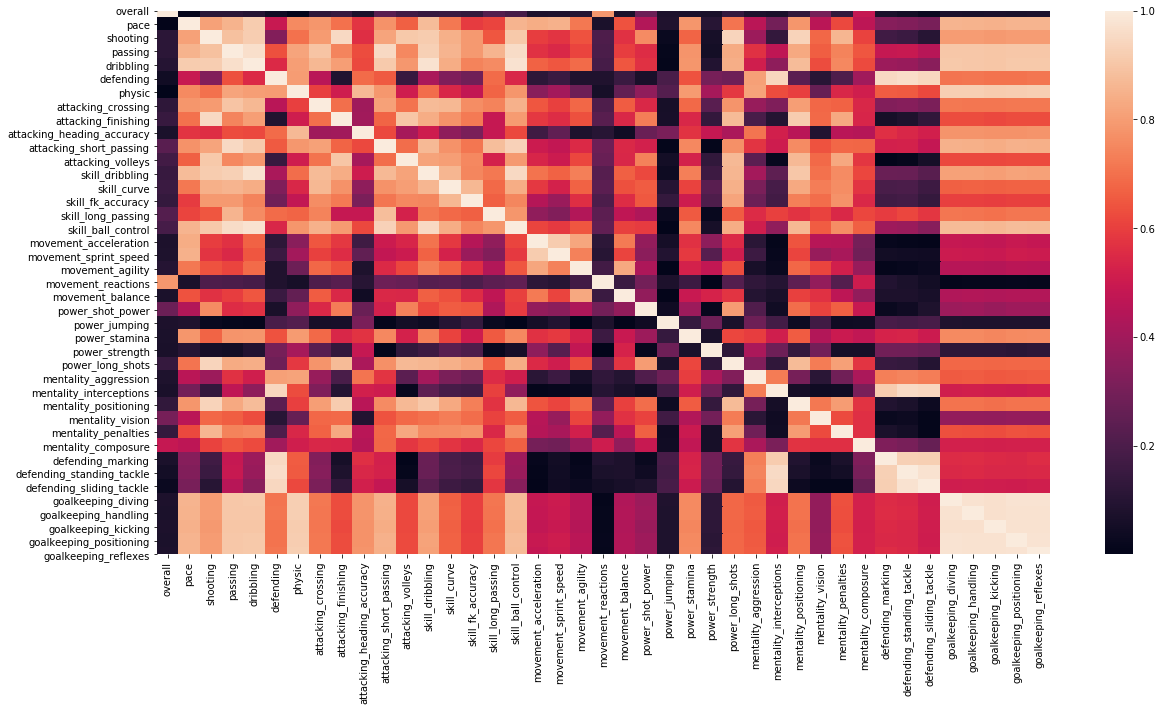

In [18]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

Given that we are just interested in the relationship between features, the sign of the correlation is worthless. The lighter the color, the stronger the relationship. 

Goalkeeper related skills are clearly strongly correltaed and hence **GK** can be considered a cluster by itself.  

Categorical features could be also removed because they are discrete and by definition they have zero variance. 

From the analysis of the correlation we can also detect that features are grouped into categories, i.e.: generic features, features related to goalkeepers, to power and stamina, attacking, defending, movility and soft skills. They will be discriminated and analysed individually to assess whether they are providing similar information and therefore be condensated by a dimensionality reduction technique. 



### Grouped features

<Figure size 720x720 with 0 Axes>

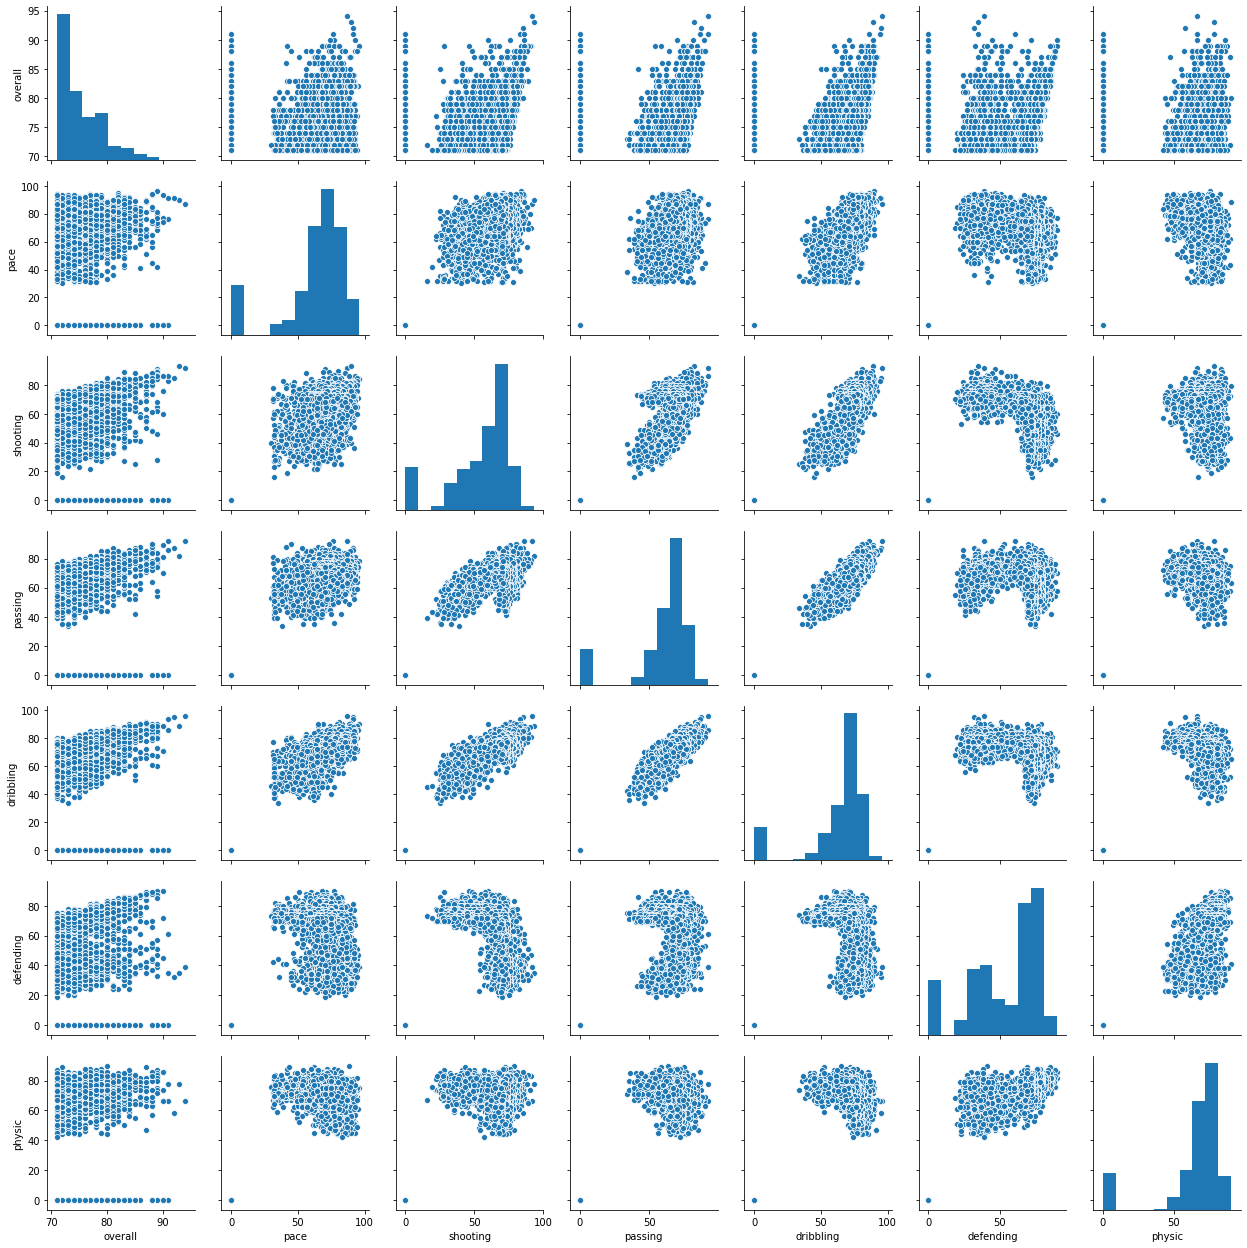

In [19]:
### Features related to speciphic charactewristics of the players
general_features = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[general_features])

From this figure we can cnclude that for all but **pace**, **defending** and **physic** there is a rather straightforward relationsahip. 
When contrasted with toher features, **defending** generally yields a halfmoon-shaped plot. It can be a considered an interesting candidate for clustering, at least for visualization purposes.

<Figure size 720x720 with 0 Axes>

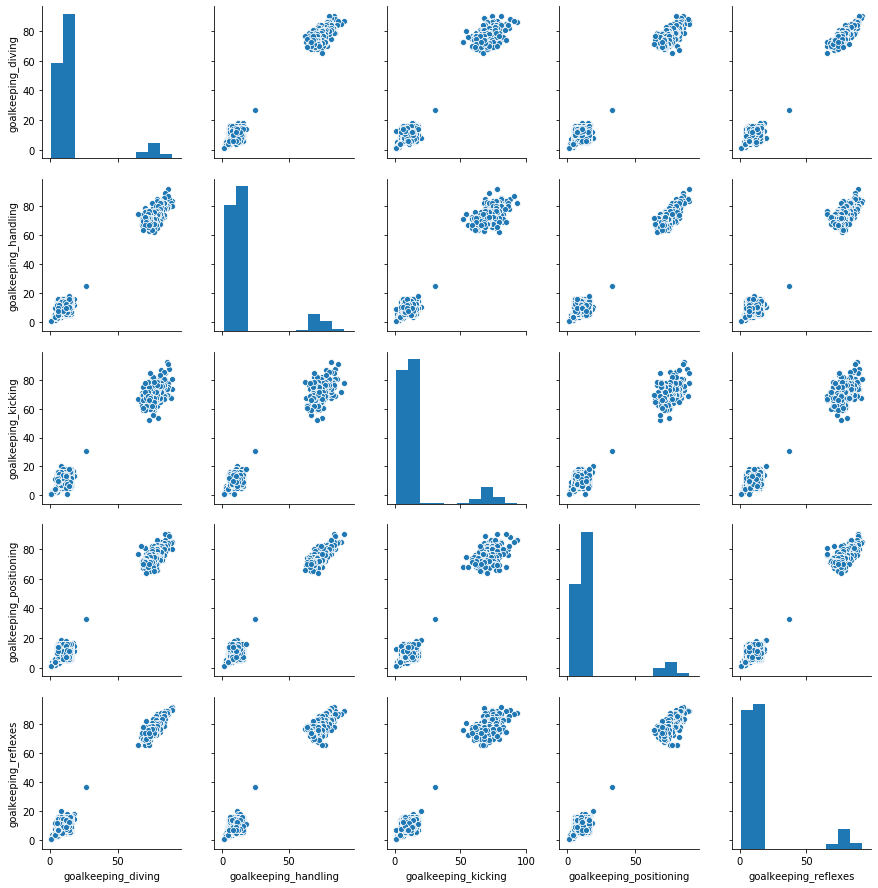

In [20]:
### Features related to speciphic charactewristics of the players
goalkeeper_features = [col for col in df_skills.columns if 'goalkeeping_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[goalkeeper_features])

Given that we are analysing the whole dataset, both with goalkeepers and fields players, these features clearly form two clusters. One, as expected, concentrates the goalkeppers while the other, field players. It must be highlighted that almost all field players do not have information for theese skills and empty values were replaced by 0's.  
Despite this fact, all variables are very closely related suggesting they provide essentialy, the same information. 

<Figure size 720x720 with 0 Axes>

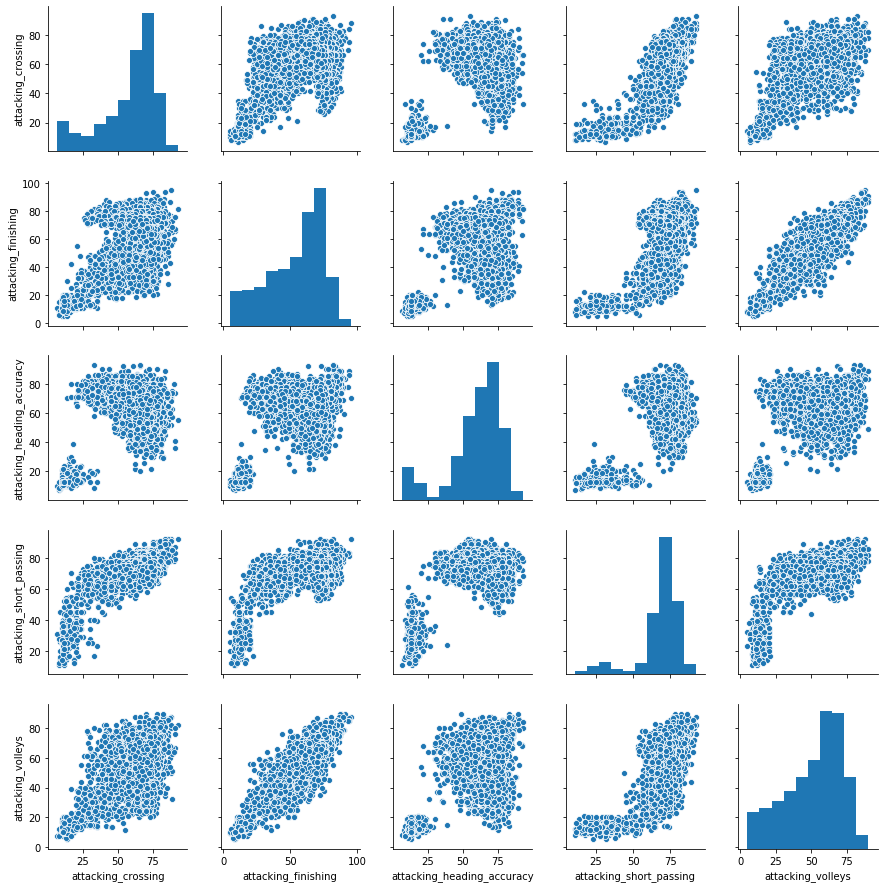

In [21]:
### Features related to speciphic charactewristics of the players
attacking_features = [col for col in df_skills.columns if 'attacking_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[attacking_features])

Attacking features have peculiar relationships. In contrast with the latter section, goalkeepers have 0's in all their attacking skills and therefore appear as a seperate group. Field players ussualy have either halmoon-shaped or linear relationships between variables. This suggests that defenders have poor attacking skills while midfielders and attackers are progressively better. 

<Figure size 720x720 with 0 Axes>

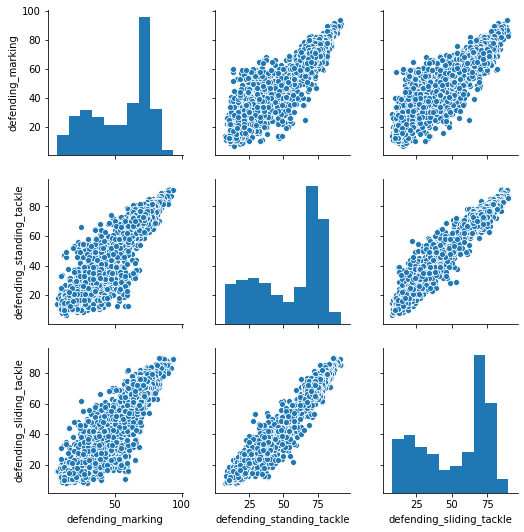

In [22]:
### Features related to speciphic charactewristics of the players
defending_features = [col for col in df_skills.columns if 'defending_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[defending_features])

In this case, goalkeepers do have certain defending though not as good as field players. Appanretly, there are two majpr groups according to the histograms. One with poor defending skills, mainly goalkeepers and attackers and other with strong ones, defenders.  

<Figure size 720x720 with 0 Axes>

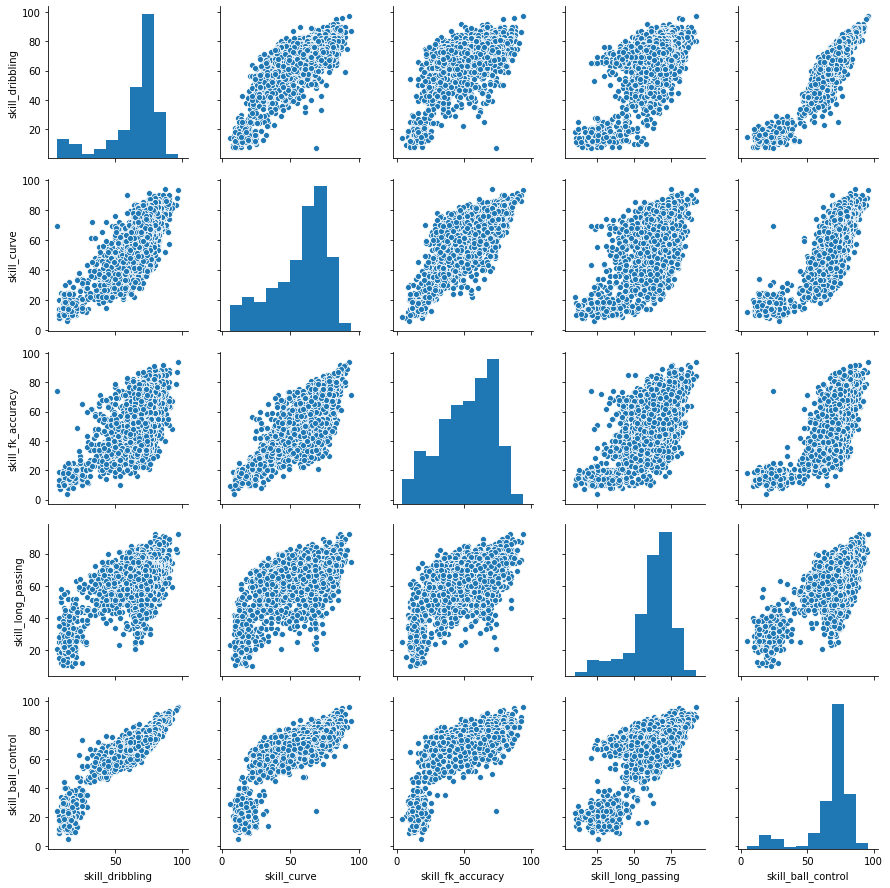

In [23]:
### Features related to speciphic characteristics of the players
skill_features = [col for col in df_skills.columns if 'skill_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[skill_features])

These features deals with the ability the player has with the ball. Once again, goalkeepers seems to be the worst with their feet. The rest of the players are rather concentrated. This is reasopnable given that we have selected the best players and despite their positions, they are able to use the ball superbly. 

<Figure size 720x720 with 0 Axes>

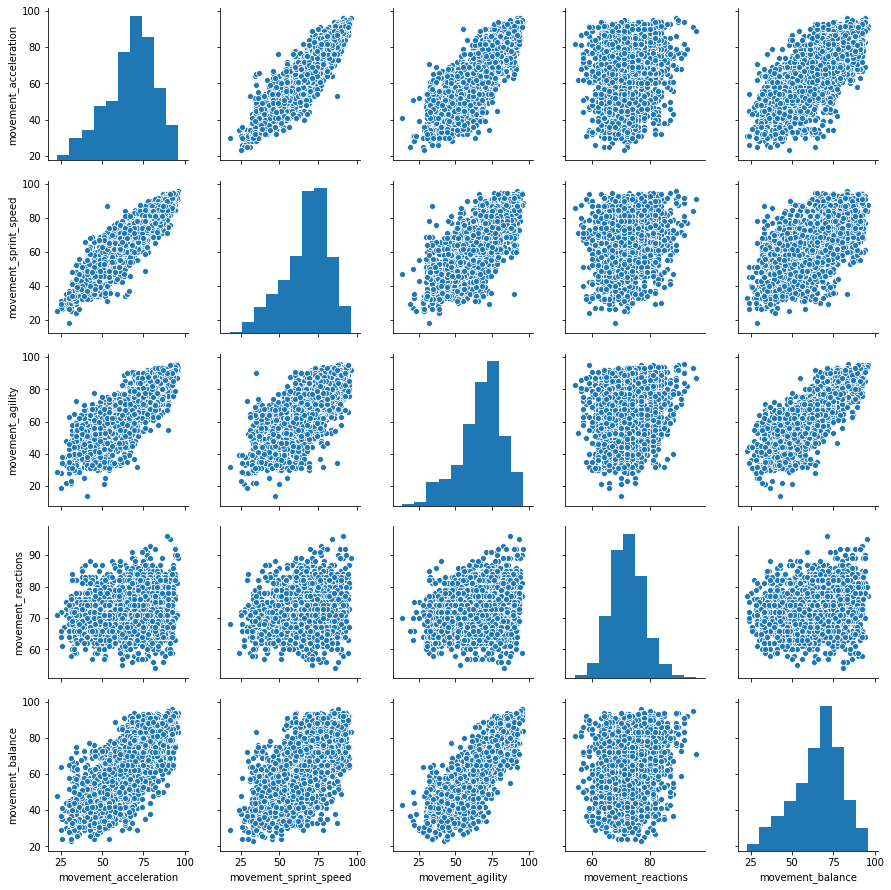

In [24]:
### Features related to speciphic charactewristics of the players
movement_features = [col for col in df_skills.columns if 'movement_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[movement_features])

There are no clear patters in the group. Though there are certain linear like relationships, the variability seems rather high. To our mind, these are not very promising skills for clustering. 

<Figure size 720x720 with 0 Axes>

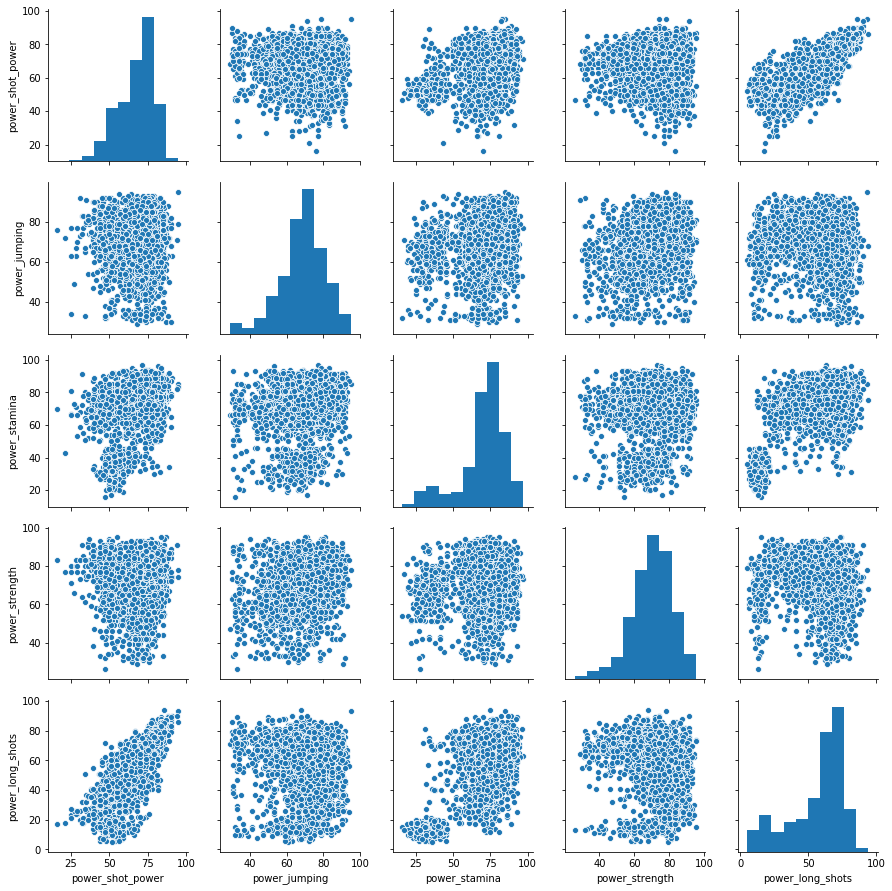

In [25]:
### Features related to speciphic characteristics of the players
power_features = [col for col in df_skills.columns if 'power_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[power_features])

Only two pair of variables, **power_long_shots** and **power_shot_power** have a relationship while the other show very high variability. These do not seem to be that promising for clustering. 

<Figure size 720x720 with 0 Axes>

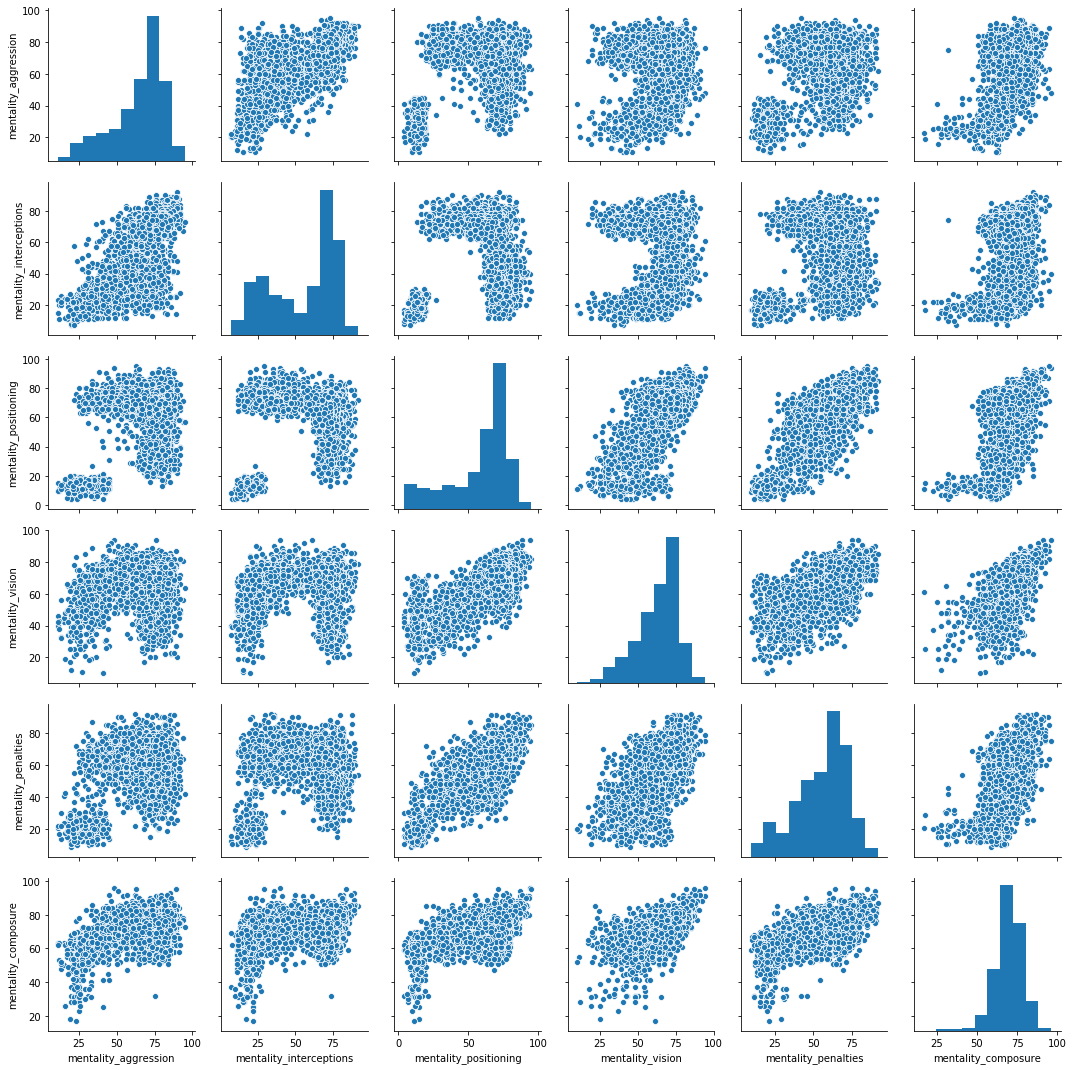

In [26]:
### Features related to speciphic charactewristics of the players
mentality_features = [col for col in df_skills.columns if 'mentality_' in col]

plt.figure(figsize=(10,10))
sns.pairplot(df_skills[mentality_features])

These features have peculiar relationships which suggest that could have relevant information to define clusters.

### Exploración de las variable a través de PCA

In [27]:
from sklearn.cluster import KMeans,MeanShift, DBSCAN,  estimate_bandwidth, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from pca import pca

In [28]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(df_skills)
scaled_dataset = pd.DataFrame(scaled_dataset, columns = df_skills.columns.to_list())

# Initialize
model = pca(n_components = .9)
# Fit transform
out = model.fit_transform(scaled_dataset)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [41] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [90.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


Given that there is certain variability in the range of the different features we are scaling the dataset to assure a propper analysis. 

We are not performing a dimensionality reduction yet just seeking the importance of each feature to the total variability thar's why we are retaining almost 90% of the total variability.

In [29]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

      PC                     feature   loading  type
0    PC1                     passing -0.206361  best
1    PC2    defending_sliding_tackle  0.312442  best
2    PC3                     overall  0.507279  best
3    PC4              power_strength  0.403410  best
4    PC5               power_jumping -0.525845  best
5    PC6               power_jumping -0.712615  best
6    PC7            power_shot_power -0.431463  best
7    PC8            mentality_vision -0.513294  best
8    PC9        mentality_aggression  0.351138  best
9   PC10         mentality_composure -0.636605  best
10  PC11            power_shot_power -0.450094  best
11  PC12            movement_balance -0.481720  best
12  PC13        mentality_aggression -0.625023  best
13  PC14         mentality_penalties  0.507079  best
14  PC15               power_stamina  0.574633  best
15  PC16          movement_reactions -0.529955  best
16  PC17          attacking_crossing  0.444965  best
17  PC18            mentality_vision  0.475866

The most relevant features are **passing** and **defending_sliding_tackle** . Those are the most strongly associated with the first two components. Other variables are also important but the two stated above are more closely related to the first components that explain nearly 80% of the total variability. Alternatives of the PCA analysis, like rotations, can improve the results by extruding the variability towards fewer components.

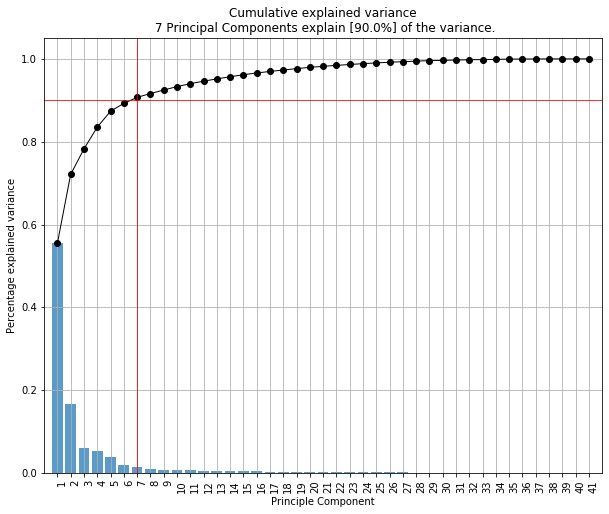

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd951f405d0>)

<Figure size 432x288 with 0 Axes>

In [30]:
model.plot()

This plot shows the accumulative variance explained by the reatined components. The first two account for over 80% of the total variance. 

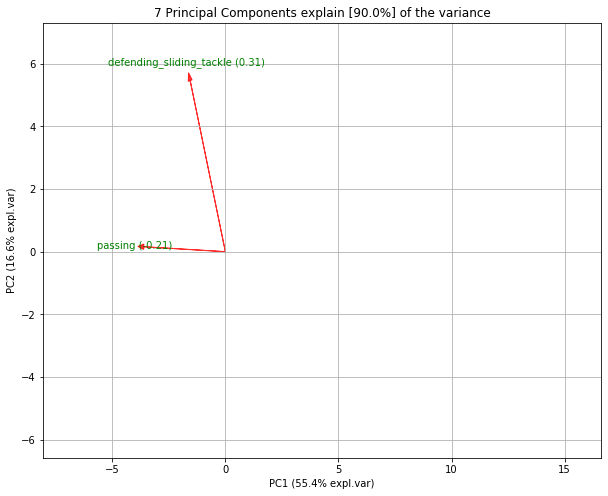

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd949fe39d0>)

In [31]:
 model.biplot(n_feat=2,  label=False, legend=False, cmap = None)

Biplots helps understand the association between features. The angle formed by intersection of the two vectors indicates how related two features are in the space created by the two selected components. 

### Análisis visual 

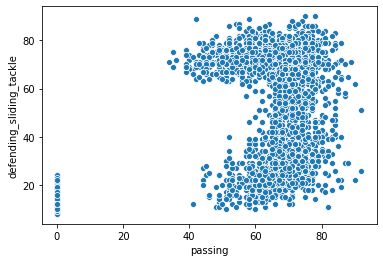

In [32]:
skill_1='passing'
skill_2='defending_sliding_tackle'
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2)

In [33]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills.dropna())

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  7691844.0004034005


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

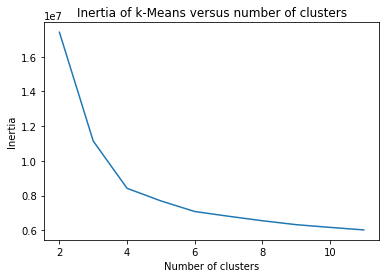

In [34]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [35]:
data=[]
bool_crack=df_n["overall"] > 95
bool_no_crack=df_n["overall"]<94


#Eligo dos números entre 0 y  de n_skills-1
skill_1='dribbling'
skill_2='defending_sliding_tackle'


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=8,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'team_position_general'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters]#,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Clustering con el dataset completo (incluyendo arqueros)

'''
#Dividimos el dataframe en arqueros y jugadores (los arqueros son jugadores) ya que las variables de arqueros
#tienen nan en jugadores y las de jugadores nan en arqueros.
df_skills_gk = df_skills[df_skills.gk_diving >=0]
player_skills = ['pace','shooting','passing','dribbling','defending','physic']
df_skills_gk=df_skills_players.drop(player_skills, axis=1)

gk_skills = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
df_skills_players=df_skills[~(df_skills.gk_diving >=0)]
df_skills_players=df_skills_players.drop(gk_skills, axis=1)
'''

In [36]:
# Buscamos los clusters para los jugadores

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  8417582.028792284


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

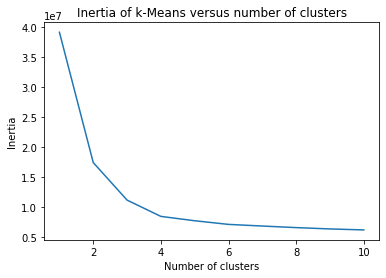

In [37]:
# Buscamos el hiperparámetro 'n_clusters', variando de 1 a 11 clusters

#Metemos la función scores dentro del grafico
scores = [KMeans(n_clusters=i+1).fit(df_skills).inertia_ for i in range(10)]
#+1 para que empiece del cluster 1 ya que range(10) va de 0 a 10

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# El conjunto de jugadores tendria 4 clusters

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [38]:
#Graficamos los grupos generados por los clusters

skill_1='defending_sliding_tackle'
skill_2='passing'


kmean_clusters = go.Scatter(
    x=df_skills[skill_1], 
    y=df_skills[skill_2],
    mode='markers',
    text=df_n.loc[:,'team_position_general'],
    marker=dict(
        size=5,
        color = clusters.astype(np.float), #set color equal to a variable
        colorscale='Portland',
        showscale=False
        )
    )

data=[kmean_clusters]

layout = go.Layout(
    title="Clustering K means ",
    titlefont=dict(size=20),
    xaxis=dict(title=skill_1),
    yaxis=dict(title=skill_2),
    autosize=False, 
    width=1000,height=1000
)

fig = go.Figure(
    data=data,
    layout=layout
    )

iplot(fig)

Here we can see clearly four groups that have little overlapping. Goalkeepers are all in the left bottom of the plot. The yellowe cluster is manily mafe up of attackers, the blue one, midfielders and the last, red, of defenders

In [39]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


#### Alternativas de K-means con transformaciones de los datos

In [40]:
scaler = StandardScaler()
normalize = Normalizer()
minmax = MinMaxScaler()

# Scaled
df_scaled = scaler.fit_transform(df_skills)
df_scaled = pd.DataFrame(df_scaled, columns = df_skills.columns)
#df_scaled.columns = df_skills.columns.to_list()

# Nomalized
df_norm = normalize.fit_transform(df_skills)
df_norm = pd.DataFrame(df_norm, columns = df_skills.columns)
#df_norm.columns = df_skills.columns.to_list()

# Min Max
df_minmax = minmax.fit_transform(df_skills)
df_minmax = pd.DataFrame(df_minmax, columns = df_skills.columns)
#df_minmax.columns = df_skills.columns.to_list()


## Evaluacion


Are transformations worth it? 

In [41]:
df_skills_kmeans = df_skills.copy()
df_skills_kmeans['cluster'] = km.labels_
df_skills_kmeans['team_position_general'] = df_n.team_position_general

In [42]:
n_clust = 4


# Scaled
km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_scaled)

# Recuperacion de etiquetas
clusters = km.labels_

df_scaled_kmeans = df_scaled.copy()
df_scaled_kmeans['cluster'] = km.labels_
df_scaled_kmeans['team_position_general'] = df_n.team_position_general

# ------------------------------------------------------------------ #

# Normalized
km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_norm)

# Recuperacion de etiquetas
clusters = km.labels_

df_norm_kmeans = df_norm.copy()
df_norm_kmeans['cluster'] = km.labels_
df_norm_kmeans['team_position_general'] = df_n.team_position_general

# ------------------------------------------------------------------ #

# MinMax
km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_minmax)

# Recuperacion de etiquetas
clusters = km.labels_

df_minmax_kmeans = df_minmax.copy()
df_minmax_kmeans['cluster'] = km.labels_
df_minmax_kmeans['team_position_general'] = df_n.team_position_general

# ------------------------------------------------------------------ #

Text(0.5, 1.0, 'Jugadores agrupados por cluster Kmeans (MinMax)')

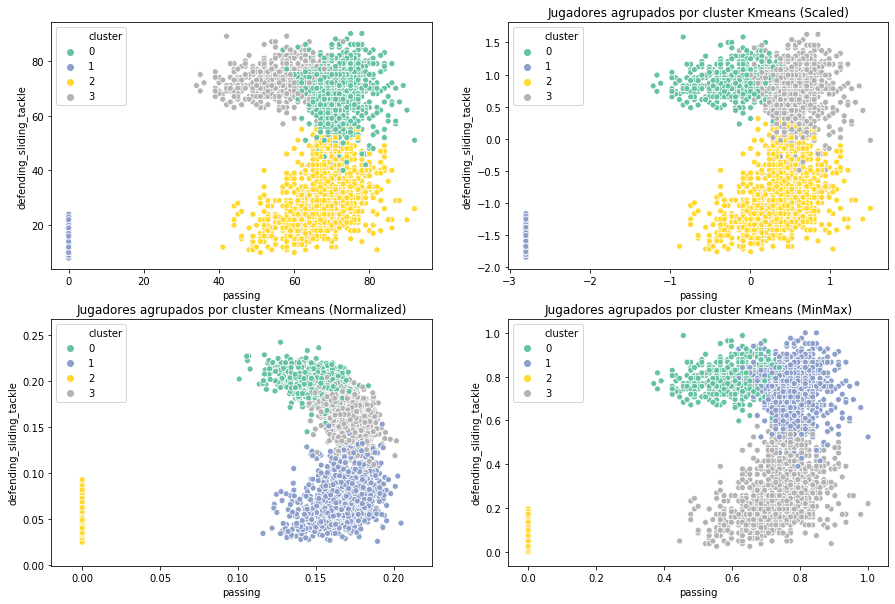

In [43]:
skill_1='passing'
skill_2='defending_sliding_tackle'

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data = df_skills_kmeans, x=skill_1, y=skill_2, hue = 'cluster', palette = 'Set2')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.subplot(2,2,2)
plt.title("Jugadores agrupados por cluster Kmeans (Original)")
sns.scatterplot(data = df_scaled_kmeans, x=skill_1, y=skill_2, hue = 'cluster', palette = 'Set2')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans (Scaled)")
plt.subplot(2,2,3)
sns.scatterplot(data = df_norm_kmeans, x=skill_1, y=skill_2, hue = 'cluster', palette = 'Set2')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans (Normalized)")
plt.subplot(2,2,4)
sns.scatterplot(data = df_minmax_kmeans, x=skill_1, y=skill_2, hue = 'cluster', palette = 'Set2')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans (MinMax)")

Apparently, data transfoprmations have little effect on the final result of the clustering. Scaling and normalizing apparently reduced the overlapping in the transitions between field players positions, i.e.: where there defenders with rather good attacking skills that are able to play in the midfield. 

Despite this fact, density plots of the transform variable (not shown) do not show a considerable improvement in the distribution of the data. 

In [44]:
#plt.figure(figsize=(20,6))
#for col in df_scaled.columns:
#    sns.kdeplot(df_scaled[col], shade=True)
#plt.legend(loc='best');

In [45]:
df_skills_crack = df_skills.copy()
df_skills_crack['short_name'] = df_n.short_name
df_skills_crack = df_skills_crack[df_skills_crack.overall > 85]

names = df_skills_crack.short_name.tolist() # saving names for later
df_skills_crack = df_skills_crack.drop(['short_name'], axis = 1) # drop the short_name column

df_skills_crack = df_skills_crack[df_skills.columns.to_list()]


In [46]:
x = df_skills_crack.values # numpy array
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

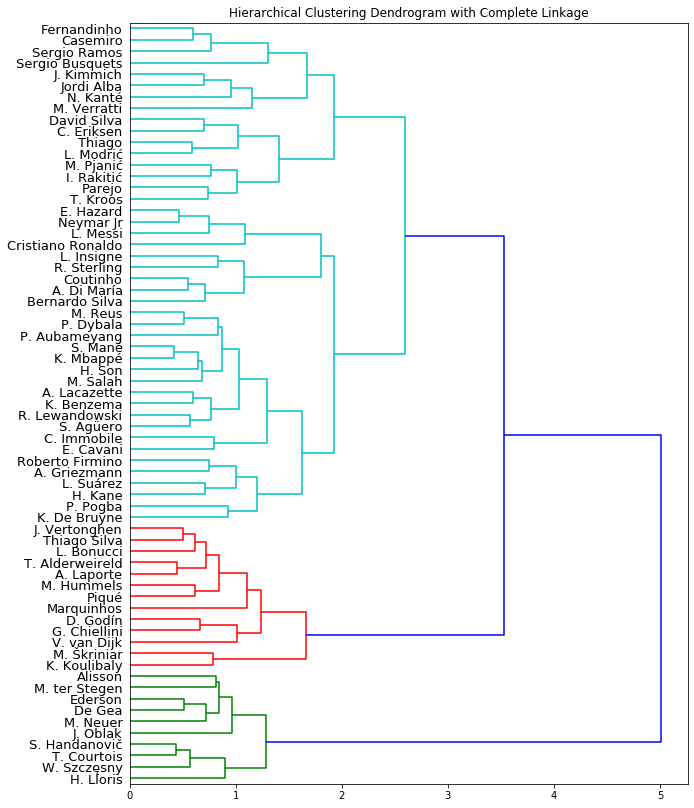

In [47]:
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(df_norm, method="complete"), 
                            labels= names, leaf_font_size = 13, 
                            orientation='right')


This methodology was just used to as trial. The algorithm is able to identify three categories or clusters: Goalkeepers (green), defenders (red) and a blend between mildfielders and attackers (light blue)

* Cantidad de observaciones por Cluster
* Análisis descriptivo separando por Cluster
* Tabla de contingencia alguna categórica vs clusters
* Silohuette?

#### Cantidad de observaciones por cluster

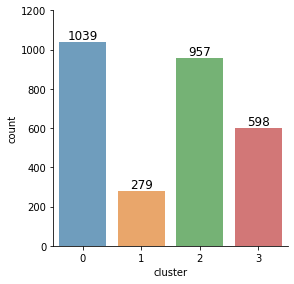

In [48]:
import math

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.factorplot('cluster', data=df_skills_kmeans, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df_skills_kmeans['cluster'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')

plt.show()

 This barplot shows the number of players per cluster. This first one is the most numerous with more than 1000 players, followed by cluster 2 with almost the same count. Cluster 3 has almost 600 players while the last one, cluster 1, has less than 300 players. 

#### Análisis descriptivo separando por Cluster

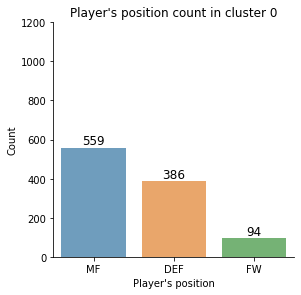

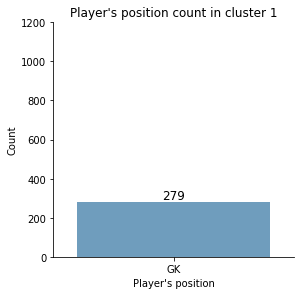

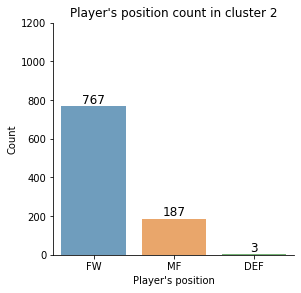

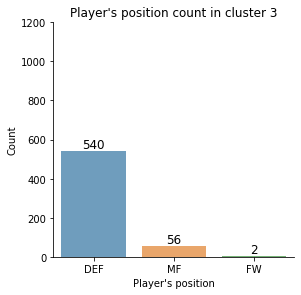

In [49]:
for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    sns.factorplot('team_position_general', data=df_skills_kmeans[df_skills_kmeans.cluster == cluster],
                   kind='count', alpha=0.7, size=4, aspect=1)

    # Get current axis on current figure
    ax = plt.gca()

    # ylim max value to be set
    y_max = df_skills_kmeans['cluster'].value_counts().max() 
    ax.set_ylim([0, roundup(y_max)])

    # Iterate through the list of axes' patches
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')
    
    plt.ylabel('Count')
    plt.xlabel("Player's position")
    plt.title("Player's position count in cluster " '%s' % (cluster))
    plt.show()

These plots depict the number of players grouped by their positions within each cluster.
* Cluster 0: The first cluster is domintaed by Defenders and Mildfielders with few Attackers. This suggests offensive skills are not prevalent within this cluster. 
* Cluster 1: This cluster is just populated by Goalkeepers
* Cluster 2: This cluster is mainly populated by Attackers and possibly opffensive Midfielders.
* Cluster 3: This cluster, on the other hand, is almost entirely comprised of Defenders.


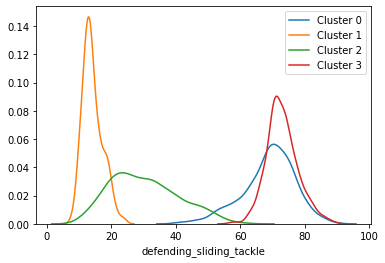

In [50]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()

variable = 'defending_sliding_tackle'

for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    if ~is_unique(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable]):
    
        sns.distplot(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable], 
                 hist = None, label = ('Cluster %s' % cluster))

This plot show the distribution of the **defending_sliding_tackle** for each group. The yellow cruve belongs to cluster one which is almost fully build up of goalkeepers. This has sense given that those players have poor defending skills. A similar case happens to cluster 2, the green curve, that's mainly related to offensive position like Attackers and offensive Midfielders. The last two curves, cluster 0 and 3, have a median of around 70 so it's related to deffensive position like Defenders. 

This feature is able to identify defenders and some midfleiders from attackers and goalkeepers. 

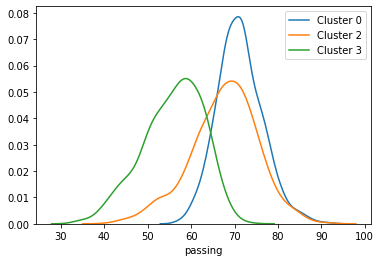

In [51]:
variable = 'passing'

for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    if ~is_unique(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable]):
    
        sns.distplot(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable], 
                 hist = None, label = ('Cluster %s' % cluster))

In this case, cluster 1 (GK) is absent because goalkeepers has no passing skills. Cluster 3, the green curve, belongs to the defenders cluster. And the two other are mainly comprised of attackers and midfielders. 

This feature is able to identify Defenders from the other two field positions. 

In [52]:
df_skills_mean = df_skills.copy()
df_skills_mean['cluster'] = clusters
df_skills_mean = df_skills_mean.groupby('cluster').mean()
df_skills_mean.reset_index(inplace = True)
df_skills_mean.head()

cluster    overall       pace   shooting    passing  dribbling  defending  \
0        0  74.390034  59.092784  41.125430  55.601375  56.804124  74.072165   
1        1  75.557784  70.017192  62.185291  71.128940  72.880611  70.006686   
2        2  75.967742   0.000000   0.000000   0.000000   0.000000   0.000000   
3        3  75.325389  75.991710  71.866321  67.635233  75.300518  37.751295   

      physic  attacking_crossing  attacking_finishing  \
0  76.235395           46.847079            34.786942   
1  72.516714           69.200573            57.248329   
2   0.000000           15.333333            13.254480   
3  65.795855           65.439378            72.527461   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                   72.991409                66.264605          34.950172   
1                   62.420248                75.155683          56.208214   
2                   14.781362                30.978495          13.824373   
3                   61.099482                71.308808          67.270466   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0        52.831615    41.721649          38.154639           62.073883   
1        72.106017    66.578797          59.769819           71.517670   
2        15.612903    15.978495          15.093190           29.573477   
3        75.436269    67.745078          61.197927           61.539896   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0           62.393471              57.560137              60.321306   
1           74.665712              70.281757              69.782235   
2           23.071685              45.311828              45.250896   
3           75.633161              76.207254              75.809326   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0         54.716495           69.711340         54.128866         56.687285   
1         71.778415           73.530086         71.042025         71.330468   
2         47.139785           71.698925         45.741935         53.232975   
3         76.489119           72.297409         72.144041         74.321244   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0      73.163230      69.218213       80.025773         40.520619   
1      69.327603      78.767908       69.499522         65.333333   
2      65.451613      34.340502       65.663082         14.107527   
3      66.373057      71.256995       66.130570         69.410363   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0             76.132302                73.690722              40.637457   
1             72.923591                71.442216              66.091691   
2             28.935484                19.652330              12.910394   
3             57.786528                35.580311              74.346114   

   mentality_vision  mentality_penalties  mentality_composure  \
0         48.524055            44.694158            67.661512   
1         69.607450            59.160458            72.689589   
2         47.154122            22.333333            54.845878   
3         69.368912            67.578238            71.801036   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0          73.721649                  75.309278                 72.881443   
1          69.700096                  71.983763                 69.165234   
2          17.362007                  14.670251                 14.189964   
3          37.003109                  34.423834                 30.499482   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0           10.438144             10.828179            10.637457   
1           10.706781             10.716332            10.782235   
2           76.340502             73.157706            70.777778   
3           10.583420             10.752332            10.672539   

   goalkeeping_positioning  goal

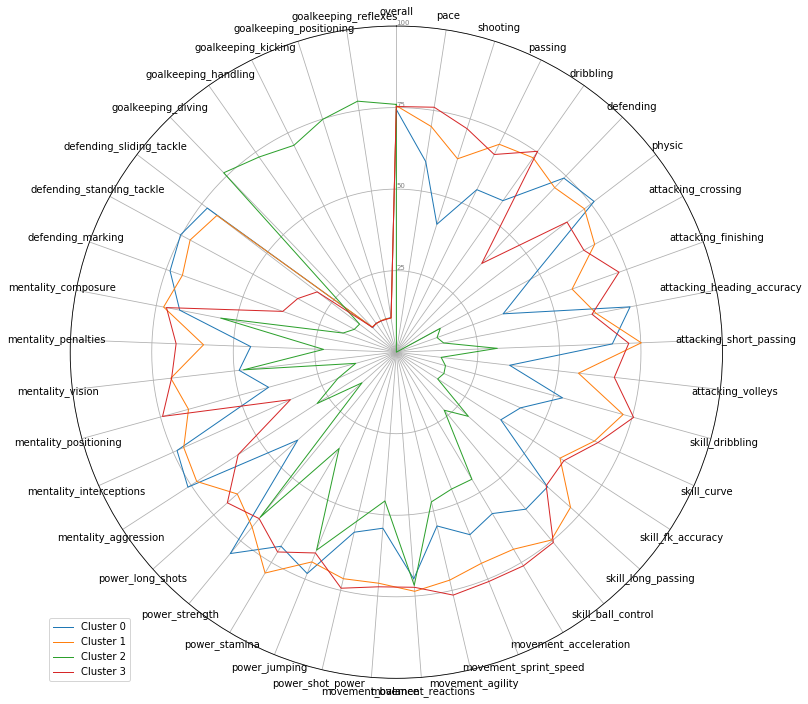

In [53]:
from math import pi

# number of variable
categories=list(df_skills_mean)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(24,12))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75,100], ["25","50","75", "100"], color="grey", size=7)
plt.ylim(0,100)

# Ind1
values=df_skills_mean.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0")
 
# Ind2
values=df_skills_mean.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1")

# Ind3
values=df_skills_mean.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2")

# Ind4
values=df_skills_mean.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 3")
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



This plot allows us to identify how the features behave between clusters. 

In [54]:
df_skills_cluster = df_skills.copy()
df_skills_cluster['cluster'] = clusters
df_skills_cluster = df_skills_cluster[['cluster', 'passing', 'defending_sliding_tackle']]

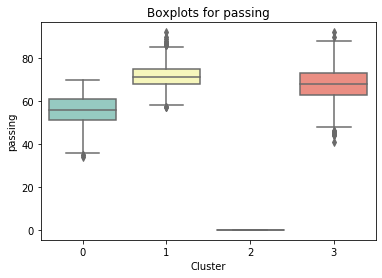

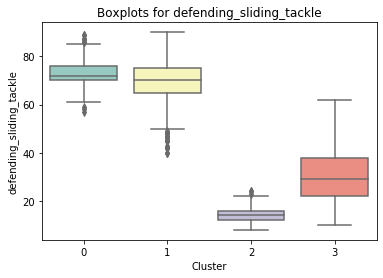

In [55]:
for feature in ['passing', 'defending_sliding_tackle']:
    ax = sns.boxplot(x="cluster", y = feature,
                 data = df_skills_cluster, palette="Set3")
    plt.ylabel(feature)
    plt.xlabel("Cluster")
    plt.title("Boxplots for " '%s' % (feature))
    plt.show()

Boxplots are clopsely related to the density plor showed above. We arrive to the same conclusions. 

##### Tabla de contingencia

In [56]:
from sklearn.metrics.cluster import contingency_matrix

conf_arr = contingency_matrix(df_skills_kmeans.team_position_general, df_skills_kmeans.cluster)
df_cm = pd.DataFrame(conf_arr, 
                  index = df_skills_kmeans.team_position_general.unique(),
                  columns = df_skills_kmeans.cluster.unique())
df_cm

2    1    0    3
FW   386    0    3  540
MF    94    0  767    2
GK     0  279    0    0
DEF  559    0  187   56

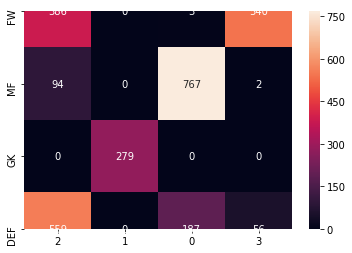

In [57]:
ax = sns.heatmap(df_cm, annot=True, vmin=0.0, fmt='.0f')


#### Silohuette

Para n_clusters = 2 El silhouette_score promedio es : 0.6610661722554962
Para n_clusters = 3 El silhouette_score promedio es : 0.36687594951268854
Para n_clusters = 4 El silhouette_score promedio es : 0.3408287175764138
Para n_clusters = 5 El silhouette_score promedio es : 0.298885838698861
Para n_clusters = 6 El silhouette_score promedio es : 0.24355465814422564


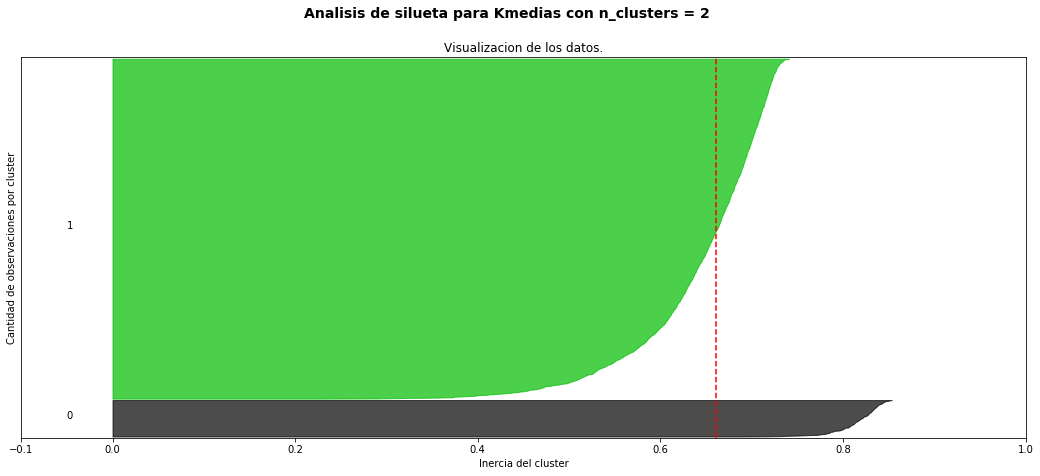

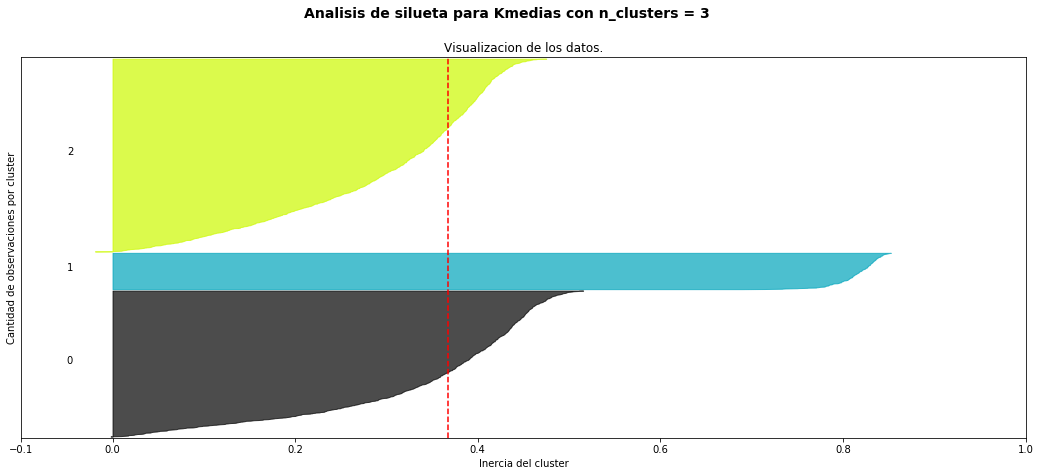

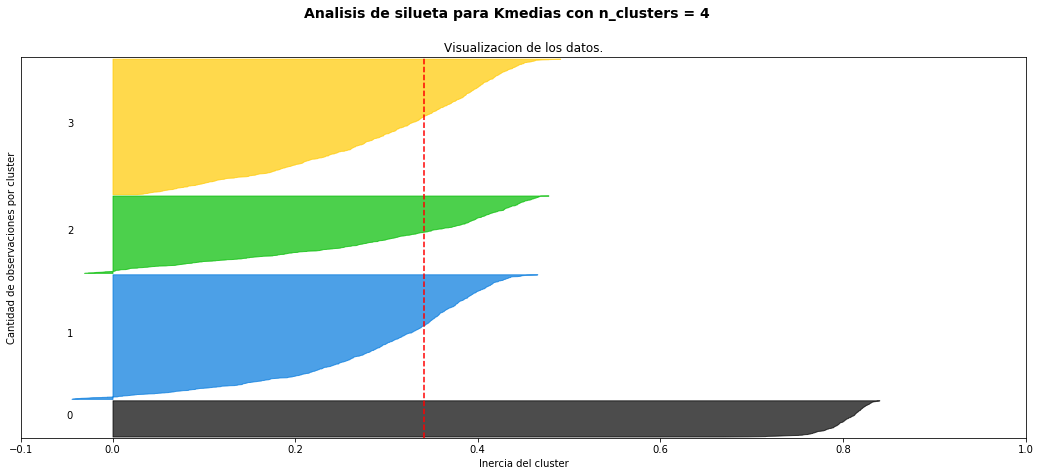

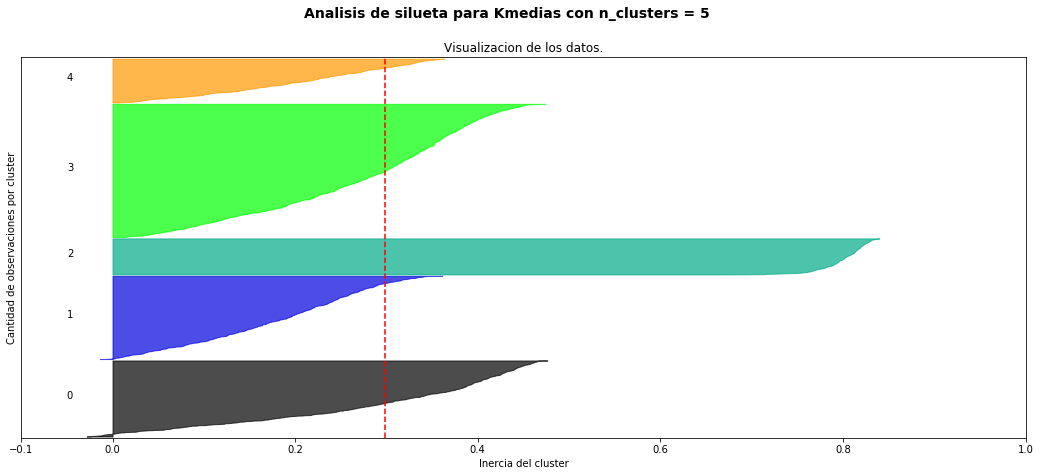

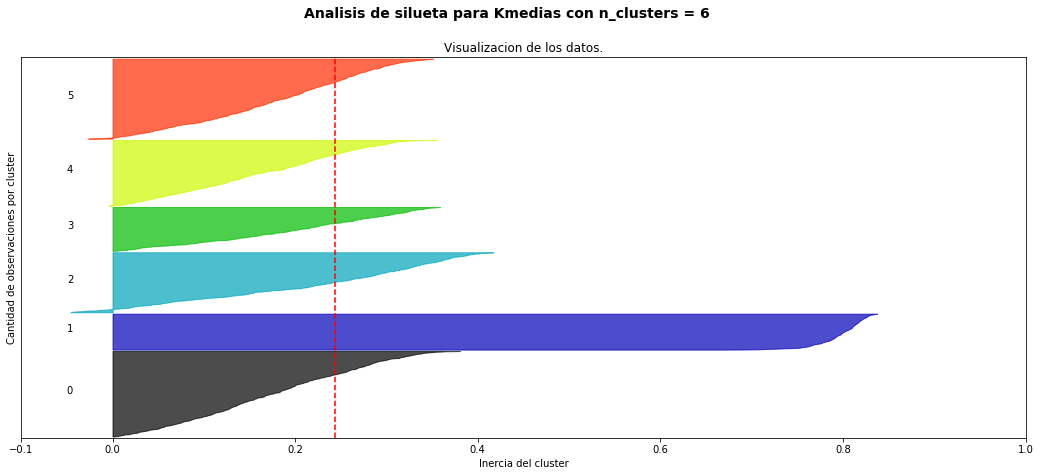

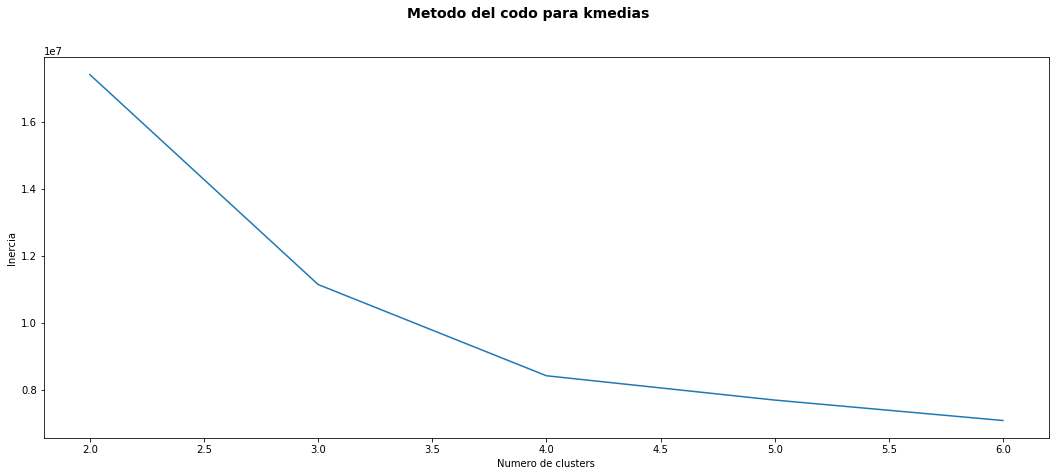

In [58]:
#Graficamos la silueta y el codo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2,3, 4, 5, 6] #cantidad de clusters que vamos a evaluar
sse ={}
for n_clusters in range_n_clusters: #armamos el bucle for para iterar
    # Create a subplot with 1 row and 1 columns
    #Si quiero mas subplots tengo que agregar figuras (ax2) e incrementar las columnas subplots(1,2).
    # Esto nos generaría graficos que se muestran en paralelo.
    
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Graficamos la silueta y definimos los límites del grafico. Como los valores negativos no nos interesan (solo nos)
    # intersa saber si los hay (porque esa clusterizacion no sirve) ponemos un limite inferior bajo, que nos
    # permite visualizar
    
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Inercia del cluster")
    ax1.set_ylabel("Cantidad de observaciones por cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Analisis de silueta para Kmedias con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),fontsize=14, fontweight='bold')

ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero de clusters")
ax1.set_ylabel("Inercia")

plt.show()

When the number of clusters increases, the silhouette_score disminishes sharply, specially when the clusters drops from 2 onwards as expected. 

Also, the increase in cluster number gos in hand with an increase in the overlapping between groups depicted by negative values of the silhouette_score

### Clustering with PCA

We will use PCA to reduce the dimensionality of the dataset

In [59]:
scaler = StandardScaler()

scaled_dataset = scaler.fit_transform(df_skills)
skills = df_skills.columns.to_list()
scaled_dataset = pd.DataFrame(scaled_dataset, columns = skills)

In [60]:
pca = decomposition.PCA(n_components=3)

df_pca = pd.DataFrame(pca.fit_transform(scaled_dataset))

In [61]:
# Proportion of variance explained by each component
print('Proportion of variance explained by each component: ', pca.explained_variance_ratio_)
# Proportion of cumulative variance
print ('Proportion of cumulative variance: ', pca.explained_variance_ratio_.cumsum())

Proportion of variance explained by each component:  [0.55441287 0.16653333 0.06163424]
Proportion of cumulative variance:  [0.55441287 0.72094619 0.78258044]


With just three components we have retained more than 80% of the total variance in the dataset.

In [62]:
# K-Means
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_pca)

# Recuperacion de etiquetas
clusters_kmeans = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  12902.334168006873


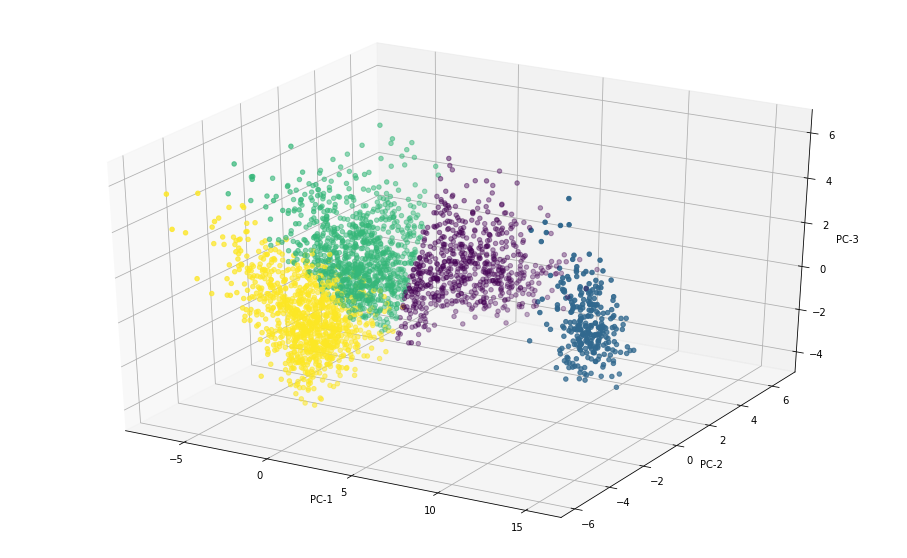

In [63]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs= df_pca.iloc[:,0], 
    ys= df_pca.iloc[:,1], 
    zs= df_pca.iloc[:,2], 
    c= clusters_kmeans
)
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
plt.show()

With three dimensions we are able to retain a higher percent of the total variability. More dimensions could constrained the visualization of the data,. 

In [64]:
# MeanShift

bandwidth = estimate_bandwidth(df_pca, quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_pca)

clusters_meanshift = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters_meanshift)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 6


We will use two hierarchical algorithms: agglomerative clustering and BIRCH and a probabilistic one: Gaussian Mixture

In [65]:
# Agglomerative

n_clusters = 4

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='cityblock')
ward.fit(df_pca)

cluster_ward = ward.labels_
labels_unique = np.unique(cluster_ward)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 4


In [66]:
# Gaussian Mixture

gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(df_pca)
pred = gmm.predict(df_pca)

In [67]:
# birch classification
from sklearn.cluster import Birch

# define the model
model = Birch(threshold=0.01)
# fit the model
model.fit(df_pca)
# assign a cluster to each example
cluster_birch = model.predict(df_pca)

labels_unique = np.unique(cluster_birch)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)


Numero estimado de clusters para average : 3


Clusters using PCA


Text(0.5, 1.0, 'Players clustered by Gaussian Mixture')

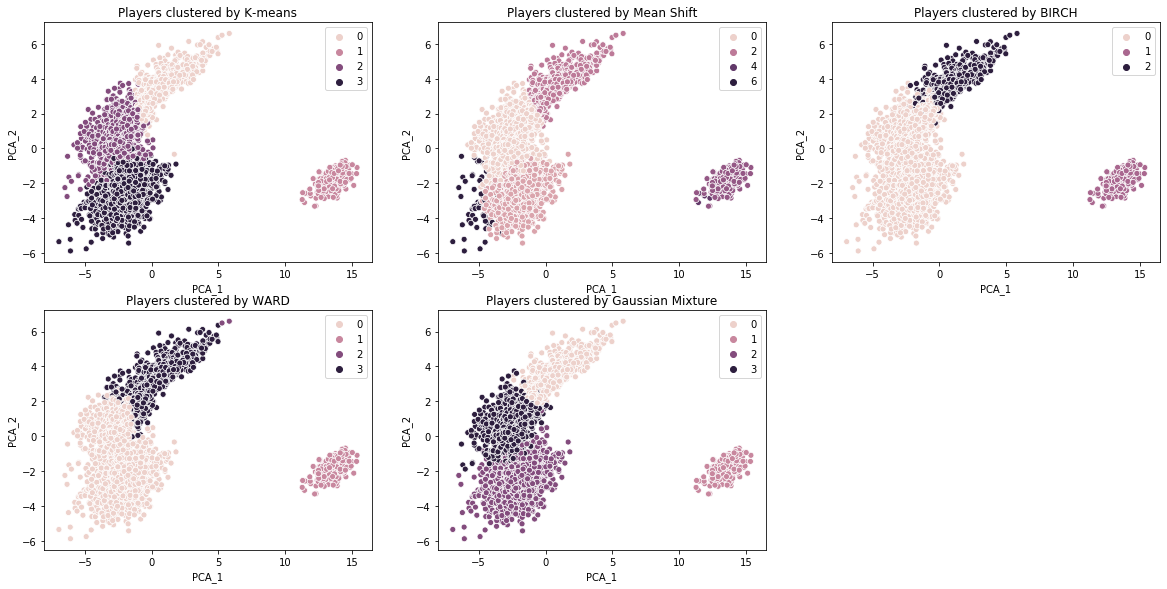

In [68]:
plt.figure(figsize=(20,15))
print('Clusters using PCA')
plt.subplot(3,3,1)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue = clusters_kmeans)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Players clustered by K-means")
plt.subplot(3,3,2)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=clusters_meanshift)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Players clustered by Mean Shift")
plt.subplot(3,3,3)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster_birch)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Players clustered by BIRCH")
plt.subplot(3,3,4)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster_ward)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Players clustered by WARD")
plt.subplot(3,3,5)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=pred)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Players clustered by Gaussian Mixture")


K-Means Gaussian Mixture yield similar cluster both in number and distribution in the space oof the two first components. Hierarchical methods are underestimating the least number of clusters. 

### Clustering with tNSE

In [104]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=3, verbose=1,perplexity=50, n_iter=1000, random_state = 0, n_jobs = -1)
df_tsne = pd.DataFrame(tsne.fit_transform(df_skills))


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2873 samples in 0.006s...
[t-SNE] Computed neighbors for 2873 samples in 0.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2873
[t-SNE] Computed conditional probabilities for sample 2000 / 2873
[t-SNE] Computed conditional probabilities for sample 2873 / 2873
[t-SNE] Mean sigma: 15.677180
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.943848
[t-SNE] KL divergence after 1000 iterations: 1.138089


Text(0.5, 1.0, 'Inercia utilizando los datos tratdos con PCA+tSNE')

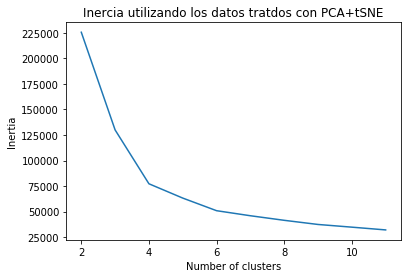

In [105]:
scores = [KMeans(n_clusters=i+2).fit(df_tsne).inertia_ for i in range(10)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inercia utilizando los datos tratdos con PCA+tSNE")

In [106]:
# Kmeans
n_clust = 4

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_tsne)

# Recuperacion de etiquetas
clusters_kmeans = km.labels_

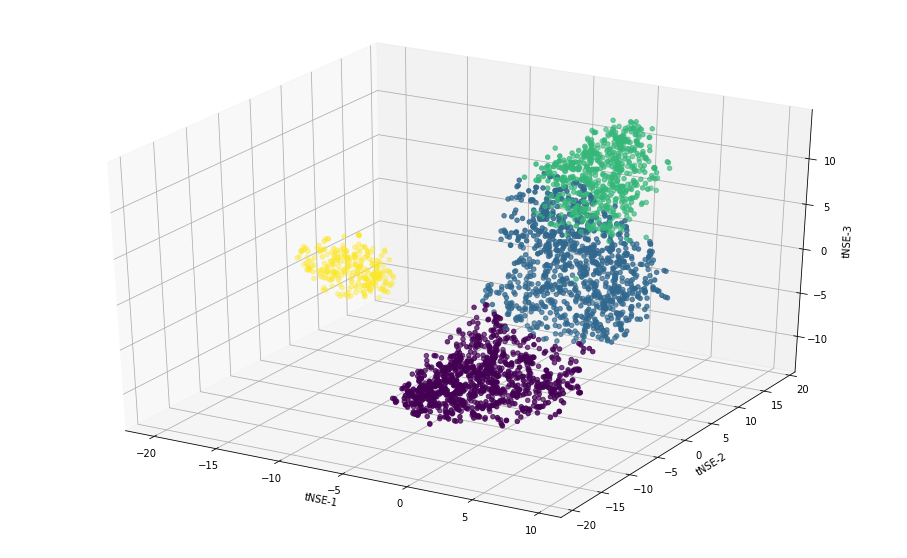

In [107]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs= df_tsne.iloc[:,0], 
    ys= df_tsne.iloc[:,1], 
    zs= df_tsne.iloc[:,2], 
    c= clusters_kmeans
)
ax.set_xlabel('tNSE-1')
ax.set_ylabel('tNSE-2')
ax.set_zlabel('tNSE-3')
plt.show()

tNSE is different to PCA in the sense that it is a probabilistic embedding instead of a purely mathematical one. At least from a visual perspective, tNSE is better than PCA. 

In [108]:
# MeanShift

bandwidth = estimate_bandwidth(df_tsne, quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_pca)

clusters_meanshift = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters_meanshift)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 2


We will use two hierarchical algorithms: agglomerative clustering and BIRCH and a probabilistic one: Gaussian Mixture

In [109]:
# Agglomerative

n_clusters = 4

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='cityblock')
ward.fit(df_tsne)

cluster_ward = ward.labels_
labels_unique = np.unique(cluster_ward)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 4


In [110]:
# Gaussian Mixture

gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(df_tsne)
pred = gmm.predict(df_tsne)

In [111]:
# birch classification
from sklearn.cluster import Birch

# define the model
model = Birch(threshold=0.01)
# fit the model
model.fit(df_tsne)
# assign a cluster to each example
cluster_birch = model.predict(df_tsne)

labels_unique = np.unique(cluster_birch)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)


Numero estimado de clusters para average : 3


Clusters using tNSE


Text(0.5, 1.0, 'Players clustered by BIRCH')

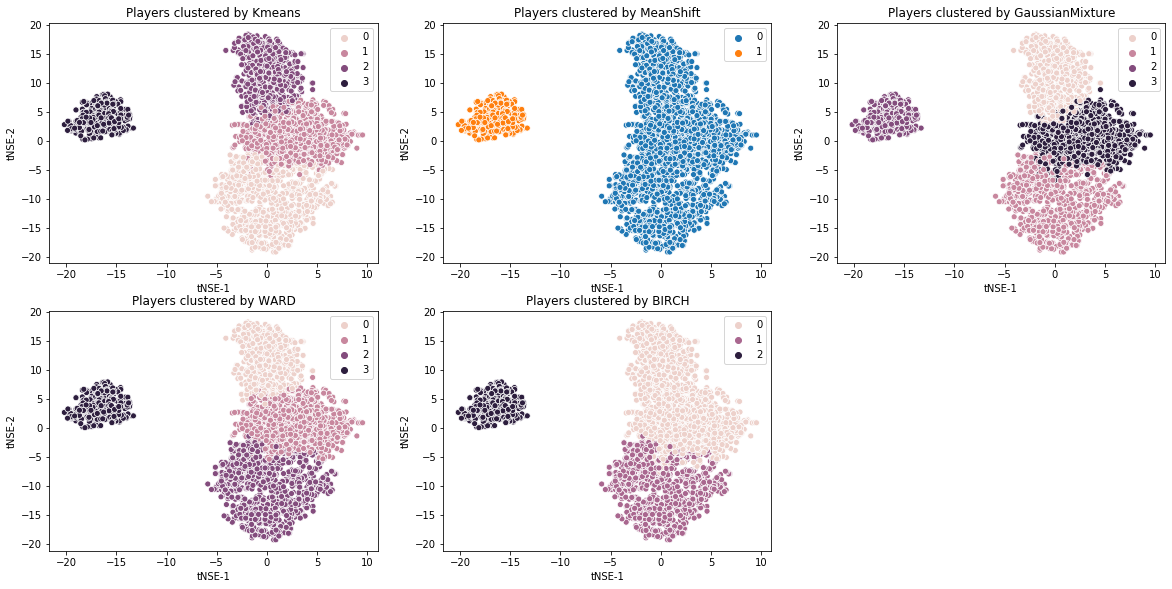

In [112]:
plt.figure(figsize=(20,15))
print('Clusters using tNSE')
plt.subplot(3,3,1)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue = clusters_kmeans)
plt.xlabel('tNSE-1')
plt.ylabel('tNSE-2')
plt.title("Players clustered by Kmeans")
plt.subplot(3,3,2)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=clusters_meanshift)
plt.xlabel('tNSE-1')
plt.ylabel('tNSE-2')
plt.title("Players clustered by MeanShift")
plt.subplot(3,3,3)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=pred)
plt.xlabel('tNSE-1')
plt.ylabel('tNSE-2')
plt.title("Players clustered by GaussianMixture")
plt.subplot(3,3,4)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=cluster_ward)
plt.xlabel('tNSE-1')
plt.ylabel('tNSE-2')
plt.title("Players clustered by WARD")
plt.subplot(3,3,5)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=cluster_birch)
plt.xlabel('tNSE-1')
plt.ylabel('tNSE-2')
plt.title("Players clustered by BIRCH")



Due to the condensation of the variability into few components, the different algortihms are able to detect more clear clusters with a reduction in the overlapping. This is specially the case for K-Means, Gaussian Mixture and hierarchical clustering. 

# Clustering con el dataset sin arqueros

In [78]:
no_gk_skills_ratings = [
    'overall',
    'pace',
    'shooting',
    'passing',
    'dribbling',
    'defending',
    'physic',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve',
    'skill_fk_accuracy',
    'skill_long_passing',
    'skill_ball_control',
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance',
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots',
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure',
    'defending_marking',
    'defending_standing_tackle',
    'defending_sliding_tackle',
]

In [79]:
n=10000

df_n=df.loc[:n]

#Eliminamos posisiones suplentes y reservas, ya que entendemos que sus posiciones en el equipo pueden no estar definidas
df_n=df_n[~((df.team_position == 'RES') | (df_n.team_position == 'SUB'))]

#Para lograr separar las diferentes posiciones, creamos la columna que quita granularidad a las posiciones
FW=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
MF=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
DEF=['RCB','CB','LCB','LB','RB','RWB','LWB']
GK=['GK']

#Alternativa 1: Usar un diccionario

posiciones = {'RF':'FW','ST':'FW', 'LW':'FW', 'LF':'FW', 'RS':'FW', 'LS':'FW', 'RM':'FW', 'LM':'FW','RW':'FW',
        'RCM':'MF','LCM':'MF','LDM':'MF','CAM':'MF','CDM':'MF','LAM':'MF','RDM':'MF','CM':'MF','RAM':'MF','CF':'MF',
        'RCB':'DEF','CB':'DEF','LCB':'DEF','LB':'DEF','RB':'DEF','RWB':'DEF','LWB':'DEF',
        'GK':'GK'}

df_n['team_position_general'] = df_n['team_position'].apply(lambda x : posiciones.get(x))


#Creamos una variable numérica para determinar la posición general del jugador según su club.

def pos_num(position):
    if position == 'FW':
        return 0
    elif position == 'MF':
        return 1
    elif position == 'DEF':
        return 2
    elif position == 'GK':
        return 3
    else:
        return 'nan'
    
df_n["team_position_num"]=df_n["team_position_general"].apply(lambda x: pos_num(x))
df_n=df_n[~(df_n.team_position_num == 'nan')]



In [80]:
df_n_no_gk=df_n[(df_n["team_position"]!='GK') & (df_n['overall']>70)]

df_skills_no_gk=df_n_no_gk[no_gk_skills_ratings]
df_skills_no_gk.fillna(value=0, inplace=True)

In [81]:
df_n.team_position.unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'RB', 'RDM', 'RAM', 'RS',
       'RF', 'CM', 'CB', 'LF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [82]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=0)
km.fit(df_skills_no_gk)

# Recuperacion de etiquetas
clusters = km.labels_


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

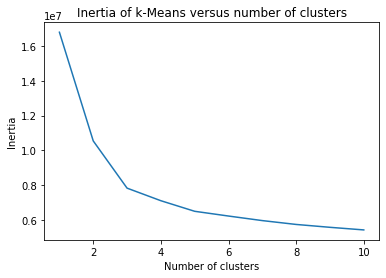

In [83]:
# Buscamos el hiperparámetro 'n_clusters', variando de 1 a 11 clusters

#Metemos la función scores dentro del grafico
scores = [KMeans(n_clusters=i+1, random_state=0).fit(df_skills_no_gk).inertia_ for i in range(10)]
#+1 para que empiece del cluster 1 ya que range(10) va de 0 a 10

from matplotlib import pyplot as plt
plt.plot(np.arange(1, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

# El conjunto de jugadores tendria 4 clusters

Quitando a los carteros, parece que el número relevante de clusters es 3.

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [84]:
#Graficamos los grupos generados por los clusters

skill_1='defending_sliding_tackle'
skill_2='passing'


kmean_clusters = go.Scatter(
    x=df_skills_no_gk[skill_1], 
    y=df_skills_no_gk[skill_2],
    mode='markers',
    text=df_n.loc[:,'team_position_general'],
    marker=dict(
        size=5,
        color = clusters.astype(np.float), #set color equal to a variable
        colorscale='Portland',
        showscale=False
        )
    )

data=[kmean_clusters]

layout = go.Layout(
    title="Clustering K means ",
    titlefont=dict(size=20),
    xaxis=dict(title=skill_1),
    yaxis=dict(title=skill_2),
    autosize=False, 
    width=1000,height=1000
)

fig = go.Figure(
    data=data,
    layout=layout
    )

iplot(fig)

In [85]:
df_clusters=df_n_no_gk.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

* Cantidad de observaciones por Cluster
* Análisis descriptivo separando por Cluster
* Tabla de contingencia alguna categórica vs clusters
* Silohuette?



In [86]:
df_skills_kmeans = df_skills_no_gk.copy()
df_skills_kmeans['cluster'] = clusters
df_skills_kmeans['team_position_general'] = df_n.team_position_general

Text(0.5, 1.0, 'Jugadores agrupados por cluster Kmeans')

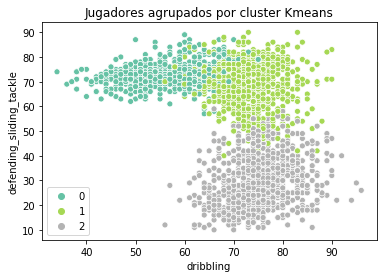

In [87]:
skill_1='dribbling'
skill_2='defending_sliding_tackle'

sns.scatterplot(data = df_skills_kmeans, x=skill_1, y=skill_2, hue=clusters, palette = 'Set2')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans")

In [88]:
df_skills_crack = df_skills_no_gk.copy()
df_skills_crack['short_name'] = df_n_no_gk.short_name
df_skills_crack = df_skills_crack[df_skills_crack.overall > 85]

names = df_skills_crack.short_name.tolist() # saving names for later
df_skills_crack = df_skills_crack.drop(['short_name'], axis = 1) # drop the short_name column

#df_skills_crack = df_skills_crack[skills]
df_skills_crack.head()

overall  pace  shooting  passing  dribbling  defending  physic  \
0       94  87.0      92.0     92.0       96.0       39.0    66.0   
1       93  90.0      93.0     82.0       89.0       35.0    78.0   
2       92  91.0      85.0     87.0       95.0       32.0    58.0   
4       91  91.0      83.0     86.0       94.0       35.0    66.0   
5       91  76.0      86.0     92.0       86.0       61.0    78.0   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
4                  81                   84                          61   
5                  93                   82                          55   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
4                       89                 83               95           83   
5                       92                 82               86           85   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
4                 79                  83                  94   
5                 83                  91                  91   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
4                     94                     88                95   
5                     77                     76                78   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
4                  90                94                82             56   
5                  91                76                91             63   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
4             84              63                80                    54   
5             89              74                90                    76   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
4                       41                     87                89   
5                       61                     88                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   
4                   88                   91                 34   
5                   79                   91                 68   

   defending_standing_tackle  defending_sliding_tackle  
0                         37                        26  
1               

In [89]:
x = df_skills_crack.values # numpy array
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

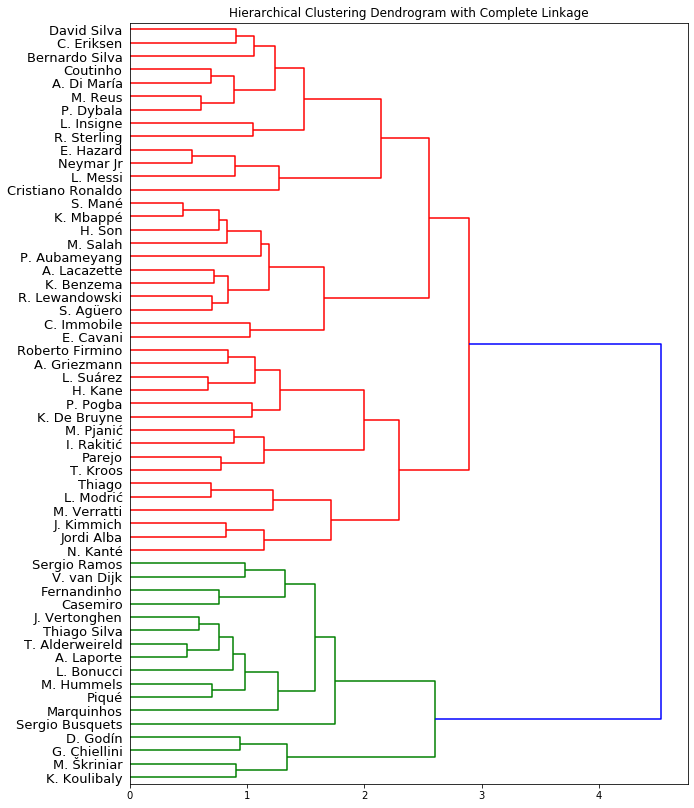

In [90]:
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(df_norm, method="complete"), 
                            labels= names, leaf_font_size = 13, 
                            orientation='right')


This methodology was just used to as trial. The algorithm is able to identify three categories or clusters: Goalkeepers (green), defenders (red) and a blend between mildfielders and attackers (light blue)

#### Cantidad de observaciones por cluster

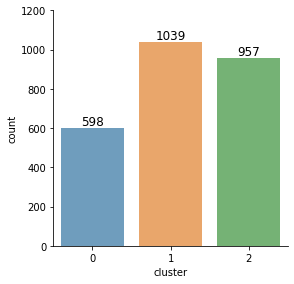

In [91]:
import math

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.factorplot('cluster', data=df_skills_kmeans, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df_skills_kmeans['cluster'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')

plt.show()

This barplot shows the number of players per cluster. This first one is the least numerous with almost 600 players, followed by cluster 2 with almost 1000. Cluster 1 is the largest with 1039 players.

#### Análisis descriptivo separando por Cluster

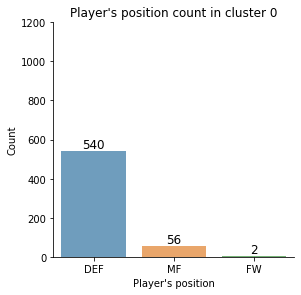

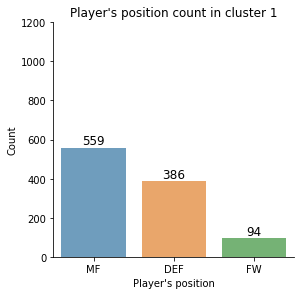

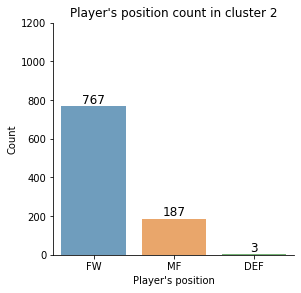

In [92]:
for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    sns.factorplot('team_position_general', data=df_skills_kmeans[df_skills_kmeans.cluster == cluster],
                   kind='count', alpha=0.7, size=4, aspect=1)

    # Get current axis on current figure
    ax = plt.gca()

    # ylim max value to be set
    y_max = df_skills_kmeans['cluster'].value_counts().max() 
    ax.set_ylim([0, roundup(y_max)])

    # Iterate through the list of axes' patches
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')
    
    plt.ylabel('Count')
    plt.xlabel("Player's position")
    plt.title("Player's position count in cluster " '%s' % (cluster))
    plt.show()

These plots depict the number of players grouped in their positions within each cluster.
* Cluster 0: The first cluster is domintaed by Defenders and Mildfielders with little Attackers. This suggests offensive skills are not prevalent within this cluster. 
* Cluster 1: This cluster is mainly populated by Defenders and possibly defensive Midfielders.
* Cluster 2: This cluster, on the other hand, is almost entirely comprised of Fowards. 



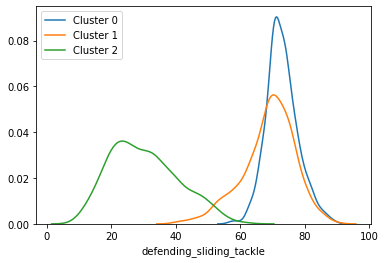

In [93]:
def is_unique(s):
    a = s.to_numpy() # s.values (pandas<0.24)
    return (a[0] == a).all()

variable = 'defending_sliding_tackle'

for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    if ~is_unique(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable]):
    
        sns.distplot(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable], 
                 hist = None, label = ('Cluster %s' % cluster))

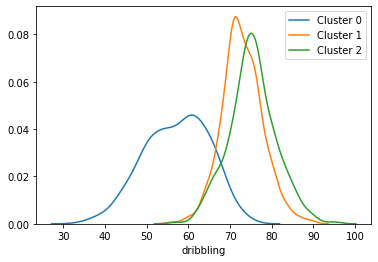

In [94]:
variable = 'dribbling'

for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    if ~is_unique(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable]):
    
        sns.distplot(df_skills_kmeans[df_skills_kmeans.cluster == cluster][variable], 
                 hist = None, label = ('Cluster %s' % cluster))

Given the similarity between these results and those showed before, at least in terms of quantity per group, there is no major difference between including the goalkeepers or not. GK's are so different to field players that they will always be a seperate cluster. 

Perhaps separating between groups of features as suggesting in the EDA stage could yield better results. 